---
title: 3.1 多层感知机
date: 2024-2-4 14:00:00
tags: [机器学习,pytorch]
categories: [机器学习]
comment: true
toc: true
---
#
<!--more-->
# 1 多层感知机
## 1.1 隐藏层
- 仿射变换中的线性是一个很强的假设。可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系类型。我们可以把前L−1层看作表示，把最后一层看作线性预测器。这种架构通常称为多层感知机（multilayer perceptron），通常缩写为MLP
![mlp](1img/1.png)
### 1.1.1 从线性到非线性
- $X \in R^{n \times d}$，$W^{(1)} \in R^{d \times h}$，$H \in R^{n \times h}$，$W^{(2)} \in R^{h \times q}$，$O \in R^{n \times q}$
- $X$是输入，$W^{(1)}$是第一层权重，$H$是第一层输出，$W^{(2)}$是第二层权重，$O$是输出
$$H = XW^{(1)}+b^{(1)}$$
$$O = HW^{(2)}+b^{(2)}$$
- 仅添加隐藏层并不能扩展表达能力：
$$O = (XW^{(1)}+b^{(1)})W^{(2)}+b^{(2)} = XW^{(1)}W^{(2)}+b^{(1)}W^{(2)}+b^{(2)}=XW+b$$
- 还需要激活函数
- 通过使用更深（而不是更广）的网络，我们可以更容易地逼近许多函数。

## 1.2 激活函数
### 1.2.1 ReLU函数
- 修正线性单元（linear unit）提供了一个简单的非线性变换：$$ReLU(x) = max(x,0)$$
- 使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题
- ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU）函数。该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：$$pReLU(x) = max(0,x)+\alpha min(0,x)$$

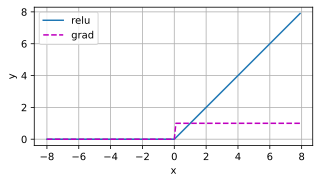

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
from d2l import torch as d2l

#relu函数
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.relu(x)

#relu函数的导数
y.backward(torch.ones_like(x),retain_graph=True)

#画图
d2l.plot(x.detach(),[y.detach(),x.grad],'x','y',figsize=(5,2.5),legend=['relu','grad'])

### 1.2.2 Sigmoid函数
- sigmoid通常称为挤压函数（squashing function）：它将范围（‐inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：$$sigmoid(x) = \frac{1}{1+e^{-x}}$$
- 导数：$$sigmoid'(x) = sigmoid(x)(1-sigmoid(x))$$

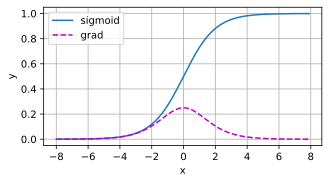

In [6]:
#sigmoid函数
y = torch.sigmoid(x)

#sigmoid函数的导数
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)

#画图
d2l.plot(x.detach(),[y.detach(),x.grad],'x','y',figsize=(5,2.5),legend=['sigmoid','grad'])

### 1.2.3 tanh函数
- 函数的形状类似于sigmoid函数，不同的是tanh函数关于坐标系原点中心对称。
$$tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$$
- 导数：$$tanh'(x) = 1-tanh^2(x)$$

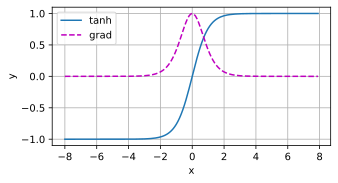

In [7]:
#tanh函数
y=torch.tanh(x)

#tanh函数的导数
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)

#画图
d2l.plot(x.detach(),[y.detach(),x.grad],'x','y',figsize=(5,2.5),legend=['tanh','grad'])